# 机器学习的四个分支

## 监督学习

## 无监督学习

## 自监督学习

## 强化学习

# 评估机器学习模型

## 训练集、验证集和测试集

In [1]:
# num_validation_samples=10000

# # 通常需要打乱数据
# np.random.shuffle(data)

# # 定义验证集
# validation_data=data[:num_validation_samples]
# data=data[num_validation_samples:]

# # 定义训练集
# training_data=data[:]

# # 在训练数据上训练模型
# model=get_model()
# # 并在验证数据上评估模型
# model.train(training_data)
# validation_score=model.evaluate(validation_data)

# # 现在你可以调节模型、重新训练、评估，然后再次调节...

# # 一旦调节好了超参数，通常就在所有非测试数据上从头开始训练最终模型
# model=get_model()
# model.train(np.concatenate([training_data,
#                            validation_data]))
# test_score=model.evaluate(test_score)

In [2]:
# k=4
# num_validation_samples=len(data)//k

# np.random.shuffle(data)

# validation_scores=[]
# for fold in range(k):
#     # 选择验证数据分区
#     validation_data=data[num_validation_samples*fold:num_validation_samples*(fold+1)]
#     # 使用剩余数据作为训练数据，注意，+运算符是列表合并，并不是求和
#     training_data=data[:num_validation_samples*fold]+data[num_validation_samples*(fold+1):]
    
#     # 创建一个全新的模型
#     model=get_model()
#     model.train(training_data)
#     validation_score=model.evaluate(validation_data)
#     validation_scores.append(validation_score)
    
# # 最终验证分数：K折验证分数的平均值
# validation_scorea=np.average(validation_scoresa)

# # 在所有非测试数据上训练最终模型
# model=get_model()
# model.train(data)
# test_score=model.evaluate(test_score)

## 评估模型的注意事项

# 数据预处理、特征工程和特征学习

## 神经网络的数据预处理

In [3]:
# # 假设x是一个形状为(samples,features)的二维矩阵
# x-=x.mean(axis=0)
# x/=x.std(axis=0)

## 特征工程

# 过拟合和欠拟合

## 减小网络大小

In [4]:
# 载入第三章电影评论分类的网络数据
from keras.datasets import imdb
import numpy as np

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

def vectorize_sequences(sequences,dimension=10000):
    # 创建一个形状为(len(sequences),dimension)的零矩阵
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        # 将result[i]的指定索引设为1
        results[i,sequence]=1.
    return results

# 将训练数据向量化
x_train=vectorize_sequences(train_data)
# 将测试数据向量化
x_test=vectorize_sequences(test_data)

y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')


x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [5]:
# 原始模型
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

original_history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

original_history_dict=original_history.history

Epoch 1/20
30/30 [==============================] - 3s 50ms/step - loss: 0.5074 - accuracy: 0.7829 - val_loss: 0.3855 - val_accuracy: 0.8660
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2998 - accuracy: 0.9053 - val_loss: 0.3013 - val_accuracy: 0.8897
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2223 - accuracy: 0.9269 - val_loss: 0.2769 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1738 - accuracy: 0.9438 - val_loss: 0.2735 - val_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1415 - accuracy: 0.9533 - val_loss: 0.2804 - val_accuracy: 0.8893
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1175 - accuracy: 0.9645 - val_loss: 0.3026 - val_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0970 - accuracy: 0.9711 - val_loss: 0.3128 - val_accuracy: 0.8830
Epoch 8/20
30

limit_output extension: Maximum message size of 10000 exceeded with 10143 characters

In [6]:
# 容量更小的模型
model=models.Sequential()
model.add(layers.Dense(4,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

smaller_history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

smaller_history_dict=smaller_history.history

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.6163 - accuracy: 0.7165 - val_loss: 0.5520 - val_accuracy: 0.8356
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4952 - accuracy: 0.8515 - val_loss: 0.4666 - val_accuracy: 0.8559
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4055 - accuracy: 0.8963 - val_loss: 0.4020 - val_accuracy: 0.8630
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3318 - accuracy: 0.9149 - val_loss: 0.3505 - val_accuracy: 0.8832
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2758 - accuracy: 0.9263 - val_loss: 0.3179 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2342 - accuracy: 0.9374 - val_loss: 0.2978 - val_accuracy: 0.8898
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2039 - accuracy: 0.9427 - val_loss: 0.2857 - val_accuracy: 0.8905
Epoch 8/20
30

limit_output extension: Maximum message size of 10000 exceeded with 10143 characters

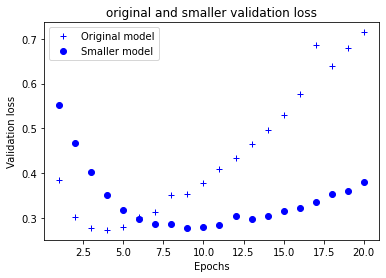

In [7]:
import matplotlib.pyplot as plt

original_val_loss_values=original_history_dict['val_loss']
smaller_val_loss_values=smaller_history_dict['val_loss']

epochs=range(1,len(original_val_loss_values)+1)

plt.plot(epochs,original_val_loss_values,'b+',label='Original model')
plt.plot(epochs,smaller_val_loss_values,'bo',label='Smaller model')
plt.title('original and smaller validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [8]:
# 容量更大的模型
model=models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

bigger_history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

bigger_history_dict=bigger_history.history

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5464 - accuracy: 0.7623 - val_loss: 0.3397 - val_accuracy: 0.8613
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2580 - accuracy: 0.8981 - val_loss: 0.2776 - val_accuracy: 0.8851
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1569 - accuracy: 0.9376 - val_loss: 0.2657 - val_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0940 - accuracy: 0.9709 - val_loss: 0.3212 - val_accuracy: 0.8908
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0773 - accuracy: 0.9785 - val_loss: 0.3153 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0049 - accuracy: 0.9999 - val_loss: 0.4794 - val_accuracy: 0.8879
Epoch 7/20
29/30 [========================>.....] - ETA: 0s - loss: 5.9413e-04 - accuracy: 1.00

limit_output extension: Maximum message size of 10000 exceeded with 10084 characters

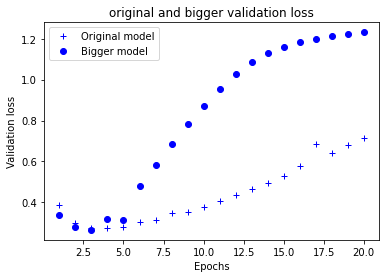

In [9]:
import matplotlib.pyplot as plt

original_val_loss_values=original_history_dict['val_loss']
bigger_val_loss_values=bigger_history_dict['val_loss']

epochs=range(1,len(original_val_loss_values)+1)

plt.plot(epochs,original_val_loss_values,'b+',label='Original model')
plt.plot(epochs,bigger_val_loss_values,'bo',label='Bigger model')
plt.title('original and bigger validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

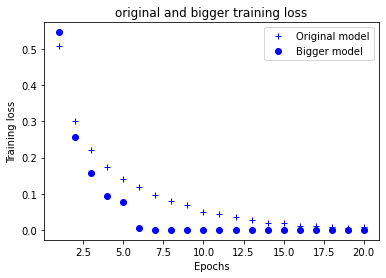

In [10]:
import matplotlib.pyplot as plt

original_val_loss_values=original_history_dict['loss']
bigger_val_loss_values=bigger_history_dict['loss']

epochs=range(1,len(original_val_loss_values)+1)

plt.plot(epochs,original_val_loss_values,'b+',label='Original model')
plt.plot(epochs,bigger_val_loss_values,'bo',label='Bigger model')
plt.title('original and bigger training loss')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

## 添加权重正则化

In [11]:
from keras import regularizers

model=models.Sequential()
model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

l2_regularized_history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

l2_regularized_history_dict=l2_regularized_history.history

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5631 - accuracy: 0.7934 - val_loss: 0.4363 - val_accuracy: 0.8699
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3710 - accuracy: 0.8941 - val_loss: 0.3664 - val_accuracy: 0.8808
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3003 - accuracy: 0.9187 - val_loss: 0.3395 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2641 - accuracy: 0.9289 - val_loss: 0.3310 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2377 - accuracy: 0.9407 - val_loss: 0.3428 - val_accuracy: 0.8820
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2239 - accuracy: 0.9452 - val_loss: 0.3381 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2140 - accuracy: 0.9481 - val_loss: 0.3455 - val_accuracy: 0.8857
Epoch 8/20
30

limit_output extension: Maximum message size of 10000 exceeded with 10143 characters

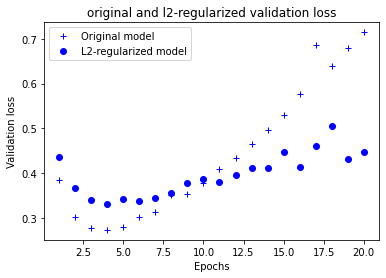

In [12]:
import matplotlib.pyplot as plt

original_val_loss_values=original_history_dict['val_loss']
l2_regularized_val_loss_values=l2_regularized_history_dict['val_loss']

epochs=range(1,len(original_val_loss_values)+1)

plt.plot(epochs,original_val_loss_values,'b+',label='Original model')
plt.plot(epochs,l2_regularized_val_loss_values,'bo',label='L2-regularized model')
plt.title('original and l2-regularized validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [13]:
from keras import regularizers

model=models.Sequential()
model.add(layers.Dense(16,kernel_regularizer=regularizers.l1(0.001),activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l1(0.001),activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

l1_regularized_history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

l1_regularized_history_dict=l1_regularized_history.history

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 1.0801 - accuracy: 0.7423 - val_loss: 0.7113 - val_accuracy: 0.8428
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6619 - accuracy: 0.8470 - val_loss: 0.6735 - val_accuracy: 0.8168
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6127 - accuracy: 0.8535 - val_loss: 0.6193 - val_accuracy: 0.8477
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5817 - accuracy: 0.8661 - val_loss: 0.5933 - val_accuracy: 0.8525
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5643 - accuracy: 0.8649 - val_loss: 0.5687 - val_accuracy: 0.8678
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5522 - accuracy: 0.8706 - val_loss: 0.5699 - val_accuracy: 0.8595
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5444 - accuracy: 0.8703 - val_loss: 0.5501 - val_accuracy: 0.8703
Epoch 8/20
30

limit_output extension: Maximum message size of 10000 exceeded with 10143 characters

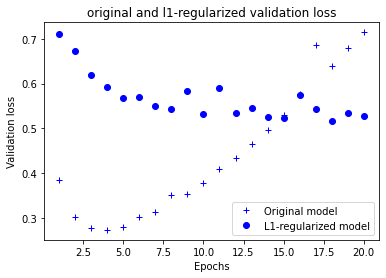

In [14]:
import matplotlib.pyplot as plt

original_val_loss_values=original_history_dict['val_loss']
l1_regularized_val_loss_values=l1_regularized_history_dict['val_loss']

epochs=range(1,len(original_val_loss_values)+1)

plt.plot(epochs,original_val_loss_values,'b+',label='Original model')
plt.plot(epochs,l1_regularized_val_loss_values,'bo',label='L1-regularized model')
plt.title('original and l1-regularized validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [15]:
from keras import regularizers

model=models.Sequential()
model.add(layers.Dense(16,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

l1_l2_regularized_history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

l1_l2_regularized_history_dict=l1_l2_regularized_history.history

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 1.0964 - accuracy: 0.7405 - val_loss: 0.7104 - val_accuracy: 0.8458
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6695 - accuracy: 0.8444 - val_loss: 0.6975 - val_accuracy: 0.7995
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6247 - accuracy: 0.8515 - val_loss: 0.6214 - val_accuracy: 0.8555
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5902 - accuracy: 0.8655 - val_loss: 0.5994 - val_accuracy: 0.8624
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5793 - accuracy: 0.8638 - val_loss: 0.5783 - val_accuracy: 0.8628
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5638 - accuracy: 0.8690 - val_loss: 0.5765 - val_accuracy: 0.8654
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5553 - accuracy: 0.8699 - val_loss: 0.5800 - val_accuracy: 0.8593
Epoch 8/20
30

limit_output extension: Maximum message size of 10000 exceeded with 10143 characters

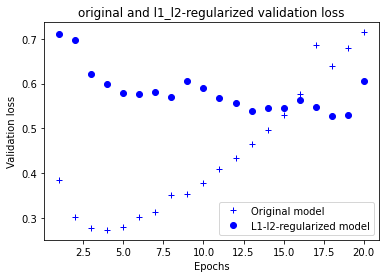

In [16]:
import matplotlib.pyplot as plt

original_val_loss_values=original_history_dict['val_loss']
l1_l2_regularized_val_loss_values=l1_l2_regularized_history_dict['val_loss']

epochs=range(1,len(original_val_loss_values)+1)

plt.plot(epochs,original_val_loss_values,'b+',label='Original model')
plt.plot(epochs,l1_l2_regularized_val_loss_values,'bo',label='L1-l2-regularized model')
plt.title('original and l1_l2-regularized validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

## 添加dropout正则化

In [18]:
# 原始模型
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

dropout_history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))
dropout_history_dict=dropout_history.history

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.6165 - accuracy: 0.6548 - val_loss: 0.4748 - val_accuracy: 0.8532
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4797 - accuracy: 0.7850 - val_loss: 0.3696 - val_accuracy: 0.8796
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4001 - accuracy: 0.8393 - val_loss: 0.3302 - val_accuracy: 0.8765
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3340 - accuracy: 0.8714 - val_loss: 0.2883 - val_accuracy: 0.8900
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2936 - accuracy: 0.8970 - val_loss: 0.2794 - val_accuracy: 0.8899
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2542 - accuracy: 0.9153 - val_loss: 0.2745 - val_accuracy: 0.8922
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2241 - accuracy: 0.9233 - val_loss: 0.2808 - val_accuracy: 0.8907
Epoch 8/20
30

limit_output extension: Maximum message size of 10000 exceeded with 10143 characters

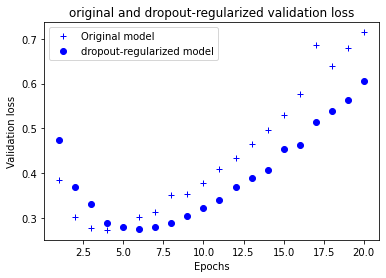

In [19]:
import matplotlib.pyplot as plt

original_val_loss_values=original_history_dict['val_loss']
dropout_val_loss_values=dropout_history_dict['val_loss']

epochs=range(1,len(original_val_loss_values)+1)

plt.plot(epochs,original_val_loss_values,'b+',label='Original model')
plt.plot(epochs,dropout_val_loss_values,'bo',label='dropout-regularized model')
plt.title('original and dropout-regularized validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# 机器学习的通用工作流程

## 定义问题，收集数据集

## 选择衡量成功的指标

## 确定评估方法

## 准备数据

## 开发比基准更好的模型

## 扩大模型规模：开发过拟合的模型

## 模型正则化与调节超参数